+----+--------------+---------+------------+
|    | Themes       |   count |   position |
|----+--------------+---------+------------|
|  0 | textual data |       1 |        704 |
|  1 | textual data |       2 |       1070 |
|  2 | textual data |       3 |       1143 |
|  3 | textual data |       4 |       1981 |
|  4 | textual data |       5 |       3562 |
|  5 | textual data |       6 |       6305 |
|  6 | textual data |       7 |       6318 |
|  7 | textual data |       8 |       6751 |
|  8 | textual data |       9 |       8611 |
|  9 | textual data |      10 |      11020 |
+----+--------------+---------+------------+


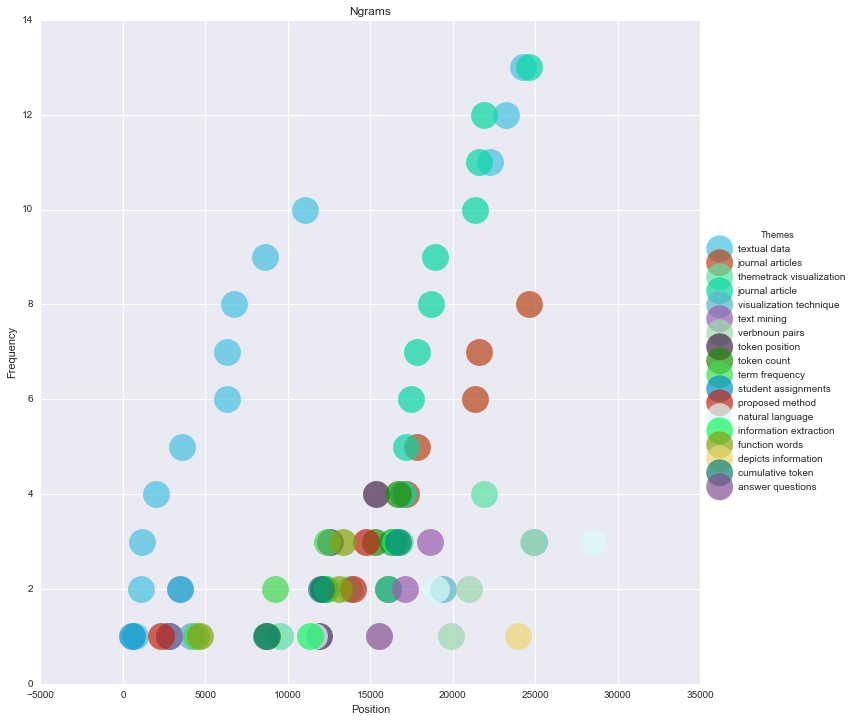

In [9]:
#Themetrack--- bigram based implementation sample

%matplotlib inline

import codecs
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from sklearn.feature_extraction.text import CountVectorizer
from tabulate import tabulate

# Read file
txtFile = codecs.open('ICALT_PAPER_112.txt', 'r', encoding='latin1') #<<<< SET PATH
txtFile = txtFile.read().lower()
clean = re.sub("[^\w\d'\s]+", '', txtFile)

# Remove noise
clean = clean.replace("'", "")

# Create bigrams, remove stopwords
vectorize = CountVectorizer(ngram_range=(2,2), stop_words='english')
analyzer = vectorize.build_analyzer()
two_grams = analyzer(clean)


# Variables
uniques = []
xval = []
yval = []
pos = []
colors = []

# Count tokens
for word in two_grams:
    if word not in uniques:
        uniques.append(word)

# Unique token counter
counts = []
for unique in uniques:
    count = 0
    for word in two_grams:  
        if word == unique:  
            count += 1
    counts.append((count, unique))

#Sort by frequency
counts.sort()
counts.reverse()  

# Get token positions
def find_index(txt, ngram, count):
    loc = []
    k = 0
    counter = 0
    while k < len(txt):
        if txt[k] != ngram[0]:
            k += 1
        elif txt[k: k + len(ngram)] == str(ngram):
            loc += [k]
            k += 1
            counter += 1
            location = loc[-1]
            pos.append(location)
            xval.append(ngram)
            yval.append(counter)
        else:
            k += 1
    return True

# Number of terms to display
for i in range(min(20, len(counts))): #<<<<<<<<<<<<<<<<<<<<<<<<
    count, word = counts[i]
    find_index(str(clean), str(word), count)

# Construct DF
df = pd.DataFrame({'Themes': xval, 'count': yval, 'position': pos})

# Print sample
print (tabulate(df[:10], headers='keys', tablefmt='psql'))

# Express position as %
#cols_to_norm = ['position']
#df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (100) / (x.max() - x.min())*((x-x.max())+x.max()))

# Randomize color 
N = len(xval)
r = lambda: random.randint(0, 255)
for genColor in range(0, N):
    colors.append('#%02X%02X%02X' % (r(), r(), r()))

# Dot size
area = np.pi * (15 * 0.5) ** 2.7

# Map to plot 
g = sns.lmplot('position', 'count', data=df, hue='Themes', palette=colors, fit_reg=False, size=10,
               scatter_kws={'alpha': 0.7, 's': area})

plt.title("Ngrams")
plt.xlabel("Position")
plt.ylabel("Frequency")

# Show results
plt.show()
